In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
# load MNIST dataset from outside working dir
parent = os.path.split(os.getcwd())[0]
print(parent)
data_path = parent + "\mnist_784_version1.pkl"
print(data_path)

with open(data_path, "rb") as file:
    mnist = pickle.load(file)

c:\Users\nagat\desktop\handonml
c:\Users\nagat\desktop\handonml\mnist_784_version1.pkl


In [3]:
print(mnist.keys())
print(mnist.target_names)
print(mnist.details)
# print(mnist.DESCR)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
['class']
{'id': '554', 'name': 'mnist_784', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 'upload_date': '2014-09-29T03:28:38', 'language': 'English', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 'status': 'active', 'processing_date': '2020-11-20 20:12:09', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [4]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

In [5]:
# view some property
print("shape of feature:", X.shape)
print("dtype of feature:", X.dtype)
print("shape of target:", y.shape)
print("dtype of target:", y.dtype)

shape of feature: (70000, 784)
dtype of feature: float64
shape of target: (70000,)
dtype of target: object


In [6]:
# convert dtype of target
y = y.astype(np.uint8)
print("new dtype:", y.dtype)

new dtype: uint8


In [7]:
# Splitting
X_train, X_test, y_train, y_test = X[:60000, :], X[60000:, :], y[:60000], y[60000:]

In [8]:
# training set
print(X_train.shape)
print(y_train.shape)
# test set 
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Labels :
 [[5 0 4 1 9]
 [2 1 3 1 4]
 [3 5 3 6 1]
 [7 2 8 6 9]
 [4 0 9 1 1]]


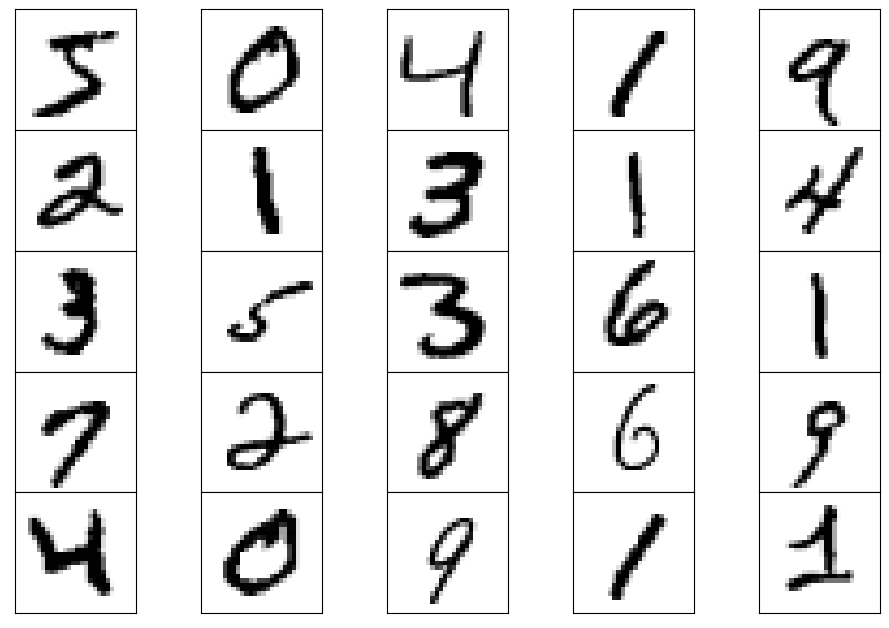

In [9]:
# Let's look at some hand-written digits
from multipleimages import multiple_images

multiple_images(imcon=X_train, nrow=5, ncol=5)
print("Labels :\n", y[:25].reshape((5, 5)))

In [10]:
# let's check if classes are imbalance or skewed
for digit in range(10):
    print(f"the number of {digit}:", (y==digit).sum(), "ratio: {:.4f}".format((y==digit).sum() / len(y)))

# looking good    

the number of 0: 6903 ratio: 0.0986
the number of 1: 7877 ratio: 0.1125
the number of 2: 6990 ratio: 0.0999
the number of 3: 7141 ratio: 0.1020
the number of 4: 6824 ratio: 0.0975
the number of 5: 6313 ratio: 0.0902
the number of 6: 6876 ratio: 0.0982
the number of 7: 7293 ratio: 0.1042
the number of 8: 6825 ratio: 0.0975
the number of 9: 6958 ratio: 0.0994


In [11]:
# let's do simple modeling
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# let's predict some image in training set
some_index = 69
pred = knn_clf.predict([X_train[some_index]])
print(pred)

[0]


ture label: 0


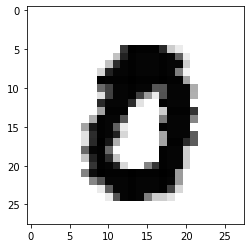

In [13]:
print("ture label:", y_train[some_index])
plt.imshow(X_train[some_index].reshape((28, 28)), cmap="binary")
# Correct guess

In [14]:
# now let's evaluate the model
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator=knn_clf,
    X=X_train,
    y=y_train,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

print("Scores:", score)
print("mean:", score.mean()) # quite impressive
print("std:", score.std())

Scores: [0.9676  0.9671  0.96755]
mean: 0.9674166666666667
std: 0.00022484562605389473


In [15]:
# now let's tune the hyperparameters 
# specifically "n_neighbors" and "weights"
from Showscore import show_score
params= [
    {"n_neighbors": 3, "weights" : "uniform"},
    {"n_neighbors": 4, "weights" : "uniform"},
    {"n_neighbors": 6, "weights" : "uniform"},
    {"n_neighbors": 9, "weights" : "uniform"},
    {"n_neighbors": 3, "weights" : "distance"},
    {"n_neighbors": 4, "weights" : "distance"},
    {"n_neighbors": 6, "weights" : "distance"},
    {"n_neighbors": 9, "weights" : "distance"},
]

for param in params:
    show_score(param, X_train, y_train) 


Scores: [0.969   0.96805 0.9675 ] mean: 0.9681833333333333 std: 0.000619587676514684
Scores: [0.96625 0.9664  0.96725] mean: 0.9666333333333333 std: 0.00044032816045410023
Scores: [0.9654 0.9652 0.9659] mean: 0.9655 std: 0.00029439202887760016
Scores: [0.96355 0.9629  0.965  ] mean: 0.9638166666666667 std: 0.0008778129388175713
Scores: [0.9704 0.9689 0.9687] mean: 0.9693333333333333 std: 0.0007586537784494233
Scores: [0.9709  0.9698  0.97035] mean: 0.9703500000000002 std: 0.0004490731195102452
Scores: [0.97005 0.96855 0.96985] mean: 0.9694833333333334 std: 0.0006649979114419788
Scores: [0.96485 0.96405 0.96615] mean: 0.9650166666666666 std: 0.0008653836657164725


In [16]:
# so we have {"n_neighbors": 4, "weights" : "distance"} as the set of hyperparameters that produce 
# best validated score (mean: 0.97035)

# well instead of using the above method to find the best set of hyperparameters
# you can just use GridSearchCV of sklearn
# but It took me over 2 hours to finish (and I really have no ideas why it took so long 
# so I just find it manually)


knn_clf = KNeighborsClassifier(**{"n_neighbors": 4, "weights" : "distance"})
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
# Let's use test set 
from sklearn.metrics import accuracy_score
pred = knn_clf.predict(X_test)
acc_score = accuracy_score(y_true=y_test, y_pred=pred)
print("Accuracy scores on test set :", acc_score) # Accuracy scores on test set : 0.9714

Accuracy scores on test set : 0.9714


In [18]:
# And that's is our model
# SAVE IT!!
# with open("knnmodel.pkl", "wb") as file:
#     pickle.dump(knn_clf, file)